## Semester Project for Advance Computer Vision CS893

## Instance Segmentation

The project is aimed at segmenting nuclei from medical images. <br>
The dataset consists of CPM17 and CoNSeP. <br>
Two architectures have been implemented using the Mask RCNN implementation from Matterport. <br>
Few additions have been incorporated to solve the existing problem.

# Install libraries

Downgrade to following versions to enable running Mask RCNN implementation

In [ ]:
! pip uninstall keras -y
! pip uninstall keras-nightly -y
! pip uninstall keras-Preprocessing -y
! pip uninstall keras-vis -y
! pip uninstall tensorflow -y
! pip uninstall h5py -y
! pip uninstall scikit-image -y

! pip install tensorflow-gpu==1.15.2
! pip install keras==2.2.5
! pip install h5py==2.10.0
! pip install scikit-image==0.16.2
# # ! pip install imgaug
# # ! pip install pycocotools

This cell is used for copying the data in Colab environment

In [ ]:
# import shutil
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# sourceFilePath = os.path.join('drive','My Drive', 'Colab Notebooks', 'CV_Project_Resnet','dataset.zip')
# shutil.unpack_archive(sourceFilePath, '/content')
# ! cp '/content/drive/My Drive/Colab Notebooks/CV_Project_Resnet/config.py' '/content'
# ! cp '/content/drive/My Drive/Colab Notebooks/CV_Project_Resnet/utils.py' '/content'
# ! cp '/content/drive/My Drive/Colab Notebooks/CV_Project_Resnet/model.py' '/content'
# ! cp '/content/drive/My Drive/Colab Notebooks/CV_Project_Resnet/visualize.py' '/content'
# ! cp '/content/drive/My Drive/Colab Notebooks/CV_Project_Resnet/customConfig.py' '/content'
# sourceFilePath = os.path.join('drive','My Drive', 'Colab Notebooks', 'CV_Project_Resnet','CoNSeP.zip')
# shutil.unpack_archive(sourceFilePath, '/content')

# Import required modules

In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
import time
import concurrent.futures
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import imgaug
from imgaug import augmenters as iaa
from scipy.optimize import linear_sum_assignment

# Root directory of the project
ROOT_DIR = os.getcwd()
    
# Import Mask RCNN

import utils
import visualize
from visualize import display_images
import model as modellib
from model import log

import customConfig as cfg
from customConfig import CustomConfig
# import importlib
# importlib.reload (cfg)

%matplotlib inline 

Using TensorFlow backend.


## Support Function for training routine

In [2]:
def train(model, dataset_dir, subset):
    """Train the model."""
    # Training dataset.
    dataset_train = cfg.NucleusDataset()
    dataset_train.load_nucleus(dataset_dir, subset)
    dataset_train.prepare()

    # Validation dataset
    dataset_val = cfg.NucleusDataset()
    dataset_val.load_nucleus(dataset_dir, "val")
    dataset_val.prepare()

    # Image augmentation
    augmentation = iaa.SomeOf((0, 2), [iaa.Fliplr(0.5),iaa.Flipud(0.5),
        iaa.OneOf([iaa.Affine(rotate=90),iaa.Affine(rotate=180),iaa.Affine(rotate=270)]),])

    history = model.train(dataset_train, dataset_val, learning_rate=config.LEARNING_RATE, epochs=22, augmentation=augmentation,layers='all')
    return history

## Build suitable configuration file

In [3]:
class ConfigurationClass(CustomConfig):
    # Choose resnet50 or resnet101
    BACKBONE = "resnet50"

## Build and Execute the model for training

In [4]:
# Select desired dataset for training
DATASET_DIR = os.path.join(ROOT_DIR, 'CPM17')
# DATASET_DIR = os.path.join(ROOT_DIR, 'CoNSeP')
config = ConfigurationClass()
model_dir = os.path.join('Logs')
model = modellib.MaskRCNN(mode="training", config=config, model_dir=model_dir)
# Use imagenet weights for initialization
weights_path = model.get_imagenet_weights(config)
# Provide correct path of saved trained model
# weights_path = os.path.join(model_dir,'nucleus20220610T1451','mask_rcnn_nucleus_0018.h5')
model.load_weights(weights_path, by_name=True)
history = train(model, DATASET_DIR, "train")
historyFilepath = os.path.join(model_dir,'historyResnet-18-22.npy')
np.save(historyFilepath,history.history)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead







Starting at epoch 0. LR=0.001

Checkpoint Path: Logs\nucleus20220612T1927\mask_rcnn_nucleus_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c

C:\Users\DELL\.conda\envs\MaskRCNN\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\DELL\.conda\envs\MaskRCNN\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
C:\Users\DELL\.conda\envs\MaskRCNN\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "






Epoch 1/22


C:\Users\DELL\.conda\envs\MaskRCNN\lib\site-packages\imgaug\augmenters\base.py:59: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (512, 512, 95) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that is the case, you should use e.g. augmenter(imageS=<your input>) or augment_imageS(<your input>). Otherwise your multi-image input will be interpreted as a single image during augmentation.
  category=SuspiciousSingleImageShapeWarning)
C:\Users\DELL\.conda\envs\MaskRCNN\lib\site-packages\imgaug\augmenters\base.py:59: SuspiciousSingleImageShapeWarning: You provided a numpy array of shape (512, 512, 38) as a single-image augmentation input, which was interpreted as (H, W, C). The last dimension however has a size of >=32, which indicates that you provided a multi-image array with shape (N, H, W) instead. If that i

  9/256 [>.............................] - ETA: 1:35:49 - loss: 5.3051 - rpn_class_loss: 1.3385 - rpn_bbox_loss: 2.7022 - mrcnn_class_loss: 0.6903 - mrcnn_bbox_loss: 0.4152 - mrcnn_mask_loss: 0.1588

KeyboardInterrupt: 

## Support Functions for model evaluation

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax
##########################################################################
######Following functions are used for metric calculations and have been copied from HoverNet implementation
### Small changes have been added to support the data in required format
##########################################################################
def remap_label(pred, by_size=False):
    """Rename all instance id so that the id is contiguous i.e [0, 1, 2, 3] 
    not [0, 2, 4, 6]. The ordering of instances (which one comes first) 
    is preserved unless by_size=True, then the instances will be reordered
    so that bigger nucler has smaller ID.
    Args:
        pred    : the 2d array contain instances where each instances is marked
                  by non-zero integer
        by_size : renaming with larger nuclei has smaller id (on-top)
    """
    pred_id = list(np.unique(pred))
    pred_id.remove(0)
    if len(pred_id) == 0:
        return pred  # no label
    if by_size:
        pred_size = []
        for inst_id in pred_id:
            size = (pred == inst_id).sum()
            pred_size.append(size)
        # sort the id by size in descending order
        pair_list = zip(pred_id, pred_size)
        pair_list = sorted(pair_list, key=lambda x: x[1], reverse=True)
        pred_id, pred_size = zip(*pair_list)

    new_pred = np.zeros(pred.shape, np.int32)
    for idx, inst_id in enumerate(pred_id):
        new_pred[pred == inst_id] = idx + 1
    return new_pred

def get_dice_1(true, pred):
    """Traditional dice."""
    true = np.argmax(true.astype(int),axis=-1)
    pred = np.argmax(pred.astype(int),axis=-1)
    # cast to binary 1st
    true = np.copy(true)
    pred = np.copy(pred)
    true[true > 0] = 1
    pred[pred > 0] = 1
    inter = true * pred
    denom = true + pred
    return 2.0 * np.sum(inter) / np.sum(denom)

#####
def get_fast_aji_plus(true, pred):
    """AJI+, an AJI version with maximal unique pairing to obtain overall intersecion.
    Every prediction instance is paired with at most 1 GT instance (1 to 1) mapping, unlike AJI 
    where a prediction instance can be paired against many GT instances (1 to many).
    Remaining unpaired GT and Prediction instances will be added to the overall union.
    The 1 to 1 mapping prevents AJI's over-penalisation from happening.

    Fast computation requires instance IDs are in contiguous orderding i.e [1, 2, 3, 4] 
    not [2, 3, 6, 10]. Please call `remap_label` before hand and `by_size` flag has no 
    effect on the result.

    """
    true = np.argmax(true.astype(int),axis=-1)
    pred = np.argmax(pred.astype(int),axis=-1)

    pred = remap_label(pred)

    true = np.copy(true)  # ? do we need this
    pred = np.copy(pred)
    true_id_list = list(np.unique(true))
    pred_id_list = list(np.unique(pred))

    true_masks = [
        None,
    ]
    for t in true_id_list[1:]:
        t_mask = np.array(true == t, np.uint8)
        true_masks.append(t_mask)

    pred_masks = [
        None,
    ]
    for p in pred_id_list[1:]:
        p_mask = np.array(pred == p, np.uint8)
        pred_masks.append(p_mask)

    # prefill with value
    pairwise_inter = np.zeros(
        [len(true_id_list) - 1, len(pred_id_list) - 1], dtype=np.float64
    )
    pairwise_union = np.zeros(
        [len(true_id_list) - 1, len(pred_id_list) - 1], dtype=np.float64
    )

    # caching pairwise
    for true_id in true_id_list[1:]:  # 0-th is background
        t_mask = true_masks[true_id]
        pred_true_overlap = pred[t_mask > 0]
        pred_true_overlap_id = np.unique(pred_true_overlap)
        pred_true_overlap_id = list(pred_true_overlap_id)
        for pred_id in pred_true_overlap_id:
            if pred_id == 0:  # ignore
                continue  # overlaping background
            p_mask = pred_masks[pred_id]
            total = (t_mask + p_mask).sum()
            inter = (t_mask * p_mask).sum()
            pairwise_inter[true_id - 1, pred_id - 1] = inter
            pairwise_union[true_id - 1, pred_id - 1] = total - inter
    #
    pairwise_iou = pairwise_inter / (pairwise_union + 1.0e-6)
    #### Munkres pairing to find maximal unique pairing
    paired_true, paired_pred = linear_sum_assignment(-pairwise_iou)
    ### extract the paired cost and remove invalid pair
    paired_iou = pairwise_iou[paired_true, paired_pred]
    # now select all those paired with iou != 0.0 i.e have intersection
    paired_true = paired_true[paired_iou > 0.0]
    paired_pred = paired_pred[paired_iou > 0.0]
    paired_inter = pairwise_inter[paired_true, paired_pred]
    paired_union = pairwise_union[paired_true, paired_pred]
    paired_true = list(paired_true + 1)  # index to instance ID
    paired_pred = list(paired_pred + 1)
    overall_inter = paired_inter.sum()
    overall_union = paired_union.sum()
    # add all unpaired GT and Prediction into the union
    unpaired_true = np.array(
        [idx for idx in true_id_list[1:] if idx not in paired_true]
    )
    unpaired_pred = np.array(
        [idx for idx in pred_id_list[1:] if idx not in paired_pred]
    )
    for true_id in unpaired_true:
        overall_union += true_masks[true_id].sum()
    for pred_id in unpaired_pred:
        overall_union += pred_masks[pred_id].sum()
    #
    aji_score = overall_inter / overall_union
    return aji_score


#####
def get_fast_pq(true, pred, match_iou=0.5):
    """`match_iou` is the IoU threshold level to determine the pairing between
    GT instances `p` and prediction instances `g`. `p` and `g` is a pair
    if IoU > `match_iou`. However, pair of `p` and `g` must be unique 
    (1 prediction instance to 1 GT instance mapping).

    If `match_iou` < 0.5, Munkres assignment (solving minimum weight matching
    in bipartite graphs) is caculated to find the maximal amount of unique pairing. 

    If `match_iou` >= 0.5, all IoU(p,g) > 0.5 pairing is proven to be unique and
    the number of pairs is also maximal.    
    
    Fast computation requires instance IDs are in contiguous orderding 
    i.e [1, 2, 3, 4] not [2, 3, 6, 10]. Please call `remap_label` beforehand 
    and `by_size` flag has no effect on the result.

    Returns:
        [dq, sq, pq]: measurement statistic

        [paired_true, paired_pred, unpaired_true, unpaired_pred]: 
                      pairing information to perform measurement
                    
    """
    assert match_iou >= 0.0, "Cant' be negative"
    true = np.argmax(true.astype(int),axis=-1)
    pred = np.argmax(pred.astype(int),axis=-1)

    pred = remap_label(pred)

    true = np.copy(true)
    pred = np.copy(pred)
    true_id_list = list(np.unique(true))
    pred_id_list = list(np.unique(pred))

    true_masks = [
        None,
    ]
    for t in true_id_list[1:]:
        t_mask = np.array(true == t, np.uint8)
        true_masks.append(t_mask)

    pred_masks = [
        None,
    ]
    for p in pred_id_list[1:]:
        p_mask = np.array(pred == p, np.uint8)
        pred_masks.append(p_mask)

    # prefill with value
    pairwise_iou = np.zeros(
        [len(true_id_list) - 1, len(pred_id_list) - 1], dtype=np.float64
    )

    # caching pairwise iou
    for true_id in true_id_list[1:]:  # 0-th is background
        t_mask = true_masks[true_id]
        pred_true_overlap = pred[t_mask > 0]
        pred_true_overlap_id = np.unique(pred_true_overlap)
        pred_true_overlap_id = list(pred_true_overlap_id)
        for pred_id in pred_true_overlap_id:
            if pred_id == 0:  # ignore
                continue  # overlaping background
            p_mask = pred_masks[pred_id]
            total = (t_mask + p_mask).sum()
            inter = (t_mask * p_mask).sum()
            iou = inter / (total - inter)
            pairwise_iou[true_id - 1, pred_id - 1] = iou
    #
    if match_iou >= 0.5:
        paired_iou = pairwise_iou[pairwise_iou > match_iou]
        pairwise_iou[pairwise_iou <= match_iou] = 0.0
        paired_true, paired_pred = np.nonzero(pairwise_iou)
        paired_iou = pairwise_iou[paired_true, paired_pred]
        paired_true += 1  # index is instance id - 1
        paired_pred += 1  # hence return back to original
    else:  # * Exhaustive maximal unique pairing
        #### Munkres pairing with scipy library
        # the algorithm return (row indices, matched column indices)
        # if there is multiple same cost in a row, index of first occurence
        # is return, thus the unique pairing is ensure
        # inverse pair to get high IoU as minimum
        paired_true, paired_pred = linear_sum_assignment(-pairwise_iou)
        ### extract the paired cost and remove invalid pair
        paired_iou = pairwise_iou[paired_true, paired_pred]

        # now select those above threshold level
        # paired with iou = 0.0 i.e no intersection => FP or FN
        paired_true = list(paired_true[paired_iou > match_iou] + 1)
        paired_pred = list(paired_pred[paired_iou > match_iou] + 1)
        paired_iou = paired_iou[paired_iou > match_iou]

    # get the actual FP and FN
    unpaired_true = [idx for idx in true_id_list[1:] if idx not in paired_true]
    unpaired_pred = [idx for idx in pred_id_list[1:] if idx not in paired_pred]
    # print(paired_iou.shape, paired_true.shape, len(unpaired_true), len(unpaired_pred))

    #
    tp = len(paired_true)
    fp = len(unpaired_pred)
    fn = len(unpaired_true)
    # get the F1-score i.e DQ
    dq = tp / (tp + 0.5 * fp + 0.5 * fn)
    # get the SQ, no paired has 0 iou so not impact
    sq = paired_iou.sum() / (tp + 1.0e-6)

    return dq, sq, dq*sq  

## Support Functions for overall metric calculations

In [6]:
def ComputeMetrics(model, dataset, image_ids, verbose=1):
    APs = []
    DiceScores = []
    AggJaccardInd = []
    DetectionQuality = []
    SegmentationQuality = []
    PenopticQuality = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect_molded(image[np.newaxis], image_meta[np.newaxis], verbose=0)
        # Compute AP over range 0.5 to 0.95
        r = results[0]
        ap = utils.compute_ap_range(
            gt_bbox, gt_class_id, gt_mask,
            r['rois'], r['class_ids'], r['scores'], r['masks'],
            verbose=0)
        APs.append(ap)
        diceScore = get_dice_1(gt_mask, r['masks'])
        DiceScores.append(diceScore)
        aji2 = get_fast_aji_plus(gt_mask, r['masks'])
        AggJaccardInd.append(aji2)
        dq, sq, pq = get_fast_pq(gt_mask, r['masks'])
        DetectionQuality.append(dq)
        SegmentationQuality.append(sq)
        PenopticQuality.append(pq)

        if verbose:
            info = dataset.image_info[image_id]
            meta = modellib.parse_image_meta(image_meta[np.newaxis,...])
            print("{:3} {}   AP: {:.2f} Dice: {:.2f} AJI: {:.2f} DQ: {:.2f} SQ: {:.2f} PQ: {:.2f}".format(
                meta["image_id"][0], meta["original_image_shape"][0], ap, diceScore, aji2, dq, sq, pq))
    return APs, DiceScores, AggJaccardInd, DetectionQuality, SegmentationQuality, PenopticQuality
## Display Image along with its mask
def DisplayImage(image,mask):
    label = ['Background', 'Nucleus']
    fig, axs = plt.subplots(1, 3, figsize=(20,10))
    axs[0].imshow(image)
    axs[0].axis('off')
    axs[0].set_title('Image')
    #plot the mask
    mask = np.argmax(mask.astype(int),axis=-1)
    axs[1].imshow(mask)
    axs[1].axis('off') 
    axs[1].set_title('Mask')
    #plot image and add the mask
    axs[2].imshow(image)
    axs[2].imshow(mask, alpha = 0.5)
    axs[2].axis('off')   
    axs[2].set_title('Image with mask overlay')
    # set suptitle
    plt.suptitle('Image with mask')
    plt.show()

## Load the model in inference mode

In [8]:
# Change the required dataset 
DATASET_DIR = os.path.join(ROOT_DIR, 'CPM17') 
# DATASET_DIR = os.path.join(ROOT_DIR, 'CoNSeP')
config = cfg.NucleusInferenceConfig()

# Load validation dataset
datasetTest = cfg.NucleusDataset()
datasetTest.load_nucleus(DATASET_DIR, "test")
datasetTest.prepare()


model_dir = os.path.join('Logs')
model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir=model_dir)
weights_path = os.path.join(model_dir,'nucleus','mask_rcnn_nucleus_0026.h5')
model.load_weights(weights_path, by_name=True)

## Overall Metric calculation

In [11]:
APs, DiceScores, AggJaccardInd, DetectionQuality, SegmentationQuality, PenopticQuality = ComputeMetrics(model, datasetTest, datasetTest.image_ids)
print("Mean AP over {} images: {:.4f}".format(len(APs), np.mean(APs)))
print("Mean Dice Coeffcient over {} images: {:.4f}".format(len(APs), np.mean(DiceScores)))
print("Mean AJI over {} images: {:.4f}".format(len(APs), np.mean(AggJaccardInd)))
print("Mean Detection Quality over {} images: {:.4f}".format(len(APs), np.mean(DetectionQuality)))
print("Mean Segmentation Quality over {} images: {:.4f}".format(len(APs), np.mean(SegmentationQuality)))
print("Mean Penoptic Quality over {} images: {:.4f}".format(len(APs), np.mean(PenopticQuality)))

## Check the performance on individual test image

image ID: nucleus.image_20 (20) image_20
Original image shape:  [500 500   3]
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:    0.00000  max:  255.00000  uint8
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32
gt_class_id              shape: (181,)                min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (181, 4)              min:    0.00000  max:  512.00000  int32
gt_mask                  shape: (512, 512, 181)       min:    0.00000  max:    1.00000  bool
diceScore: 0.7258995927632018
detection quality: 0.6054421768707483
segmentation quality: 0.7122509902119337
penoptic quality: 0.4312267899922592
AP @0.50:	 0.449
AP @0.55:	 0.403
AP @0.60:	 0.349
AP @0.65:	 0.300
AP @0.70:	 0.194
AP @0.75:	

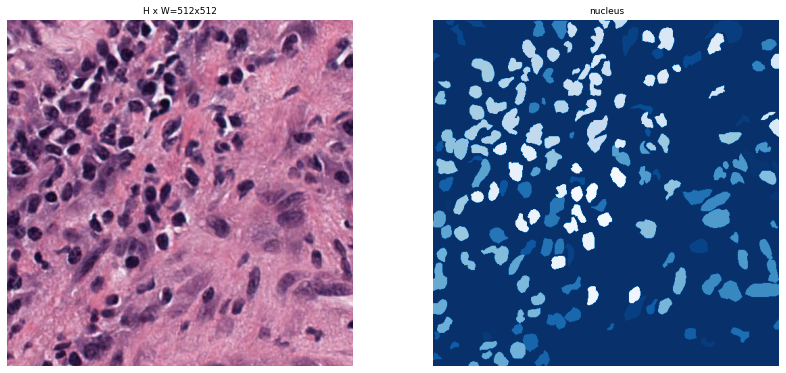

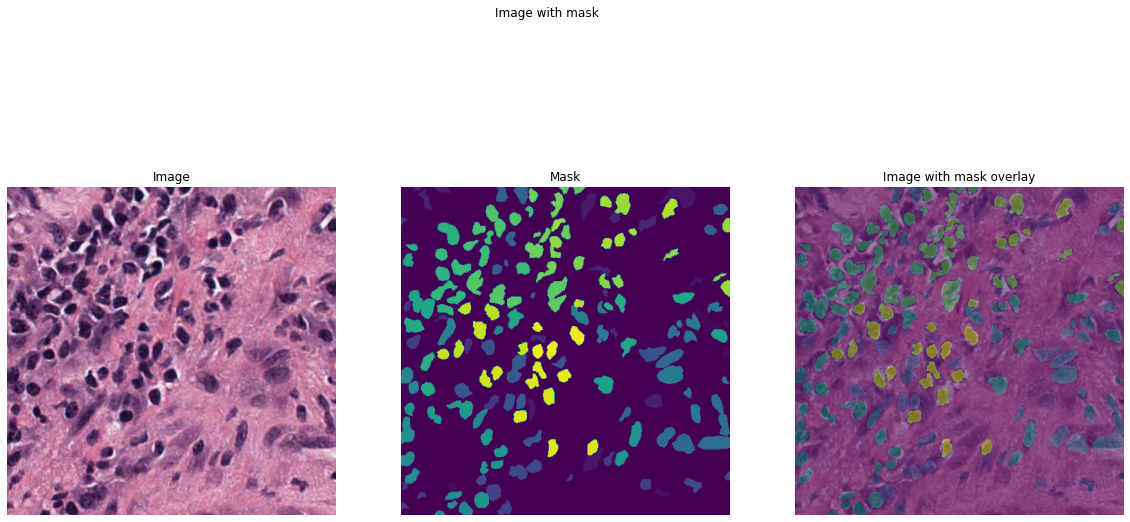

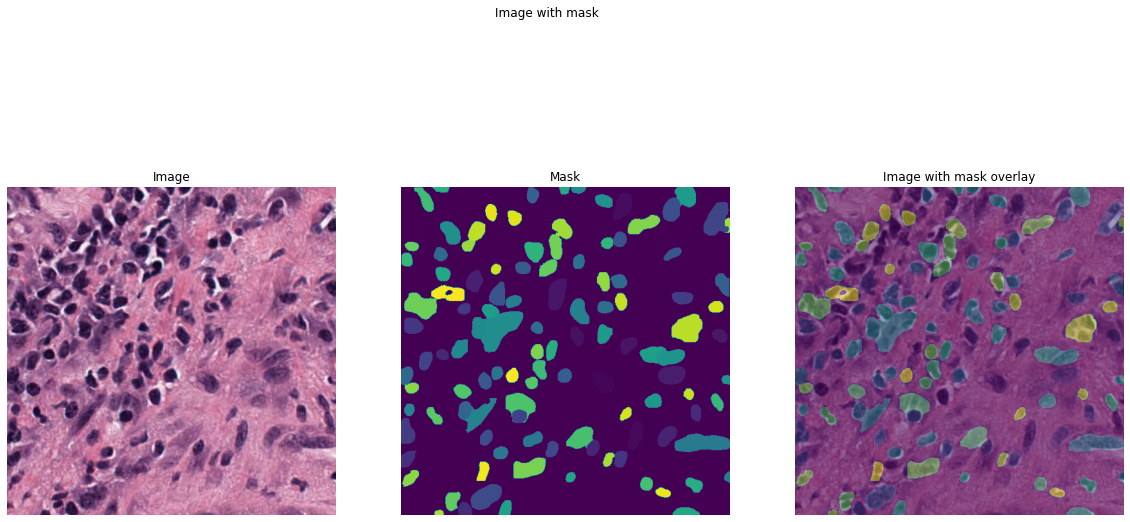

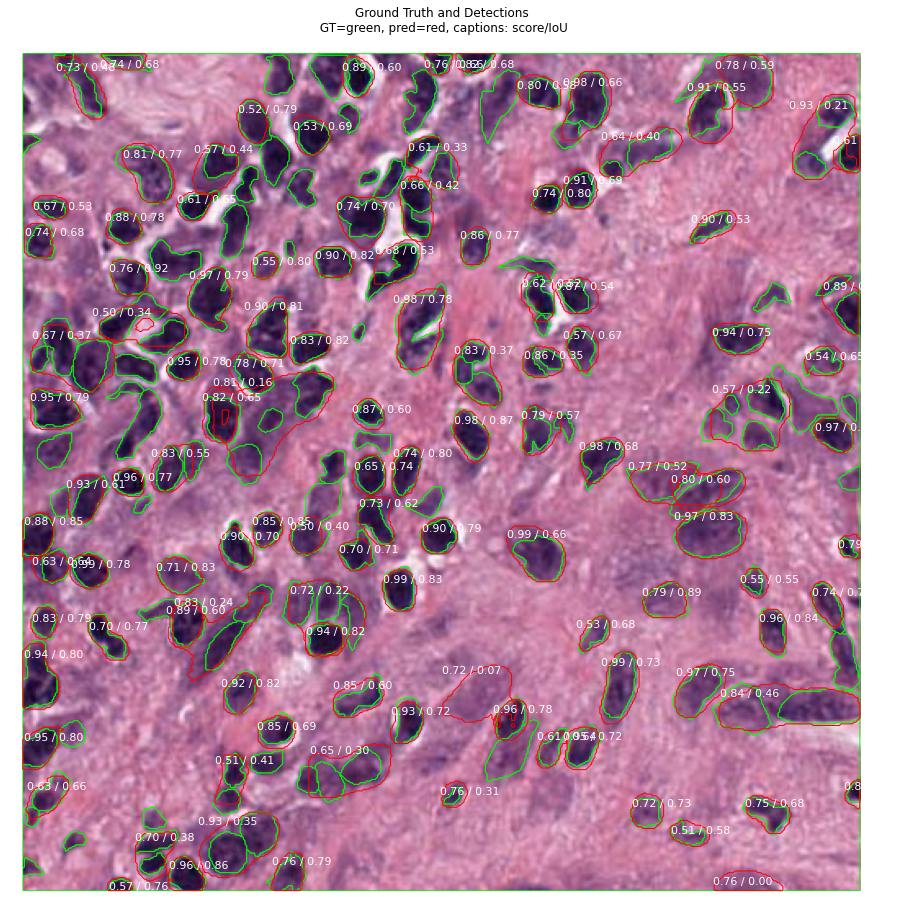

In [10]:
image_id = random.choice(datasetTest.image_ids)
# image_id = datasetTest.image_ids[1]
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(datasetTest, config, image_id, use_mini_mask=False)
info = datasetTest.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       datasetTest.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

diceScore = get_dice_1(gt_mask, r['masks'])
# aji2 = get_fast_aji_plus(gt_mask, r['masks'])
dq, sq, pq = get_fast_pq(gt_mask, r['masks'])

print("diceScore: " +  str(diceScore))
# print("Agg Jaccard Index: " + str(aji2))
print("detection quality: " +  str(dq))
print("segmentation quality: " +  str(sq))
print("penoptic quality: " +  str(pq))

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)


visualize.display_top_masks(image, gt_mask, gt_class_id, datasetTest.class_names, limit=1)
DisplayImage(image,gt_mask)
DisplayImage(image,r['masks'])

visualize.display_differences(image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    datasetTest.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)